In [15]:
# Retail Marketing EDA: Comprehensive Jupyter Notebook

In [16]:
# =========================================================
# 0. Setup: Create directory for plots and import packages
# =========================================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.lines as mlines

plot_dir = 'eda_plots'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
print(f"Directory '{plot_dir}' is set for saving plots.")

# Set global Seaborn style and palette for consistency
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

Directory 'eda_plots' is set for saving plots.


In [17]:
# =========================================================
# 1. Load Dataset and Initial Overview
# =========================================================
df = pd.read_csv('marketing_campaign.csv')

print("Shape of dataset:", df.shape)
print("\nData Info:")
print(df.info())

display(df.head())

print("\nMissing Values per Column:")
print(df.isnull().sum())

for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} unique values")

Shape of dataset: (2240, 30)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43



Missing Values per Column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64
Education: 5 unique values
Marital_Status: 8 unique values
Dt_Customer: 663 unique values


In [18]:
# =========================================================
# 2. Data Cleaning & Feature Engineering
# =========================================================
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

marital_cleanup = {'YOLO': 'Other', 'Absurd': 'Other', 'Alone': 'Other'}
df['Marital_Status'] = df['Marital_Status'].replace(marital_cleanup)

df = df[df['Age'] <= 100]
df = df[df['Income'] <= 200000]

df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 30, 45, 60, 120],
    labels=['18-30', '31-45', '46-60', '60+']
)

,mean,std,50%,min,max
ID,5585.160940,3247.523735,5454.5,0.0,11191.0
Year_Birth,1968.913653,11.701599,1970.0,1940.0,1996.0
Income,51958.810579,21527.278844,51371.0,1730.0,162397.0
Kidhome,0.441682,0.536955,0.0,0.0,2.0
Teenhome,0.505877,0.544253,0.0,0.0,2.0
Recency,49.019439,28.943121,49.0,0.0,99.0
MntWines,305.287523,337.322940,175.5,0.0,1493.0
MntFruits,26.329566,39.744052,8.0,0.0,199.0
MntMeatProducts,167.029837,224.254493,68.0,0.0,1725.0
MntFishProducts,37.648734,54.772033,12.0,0.0,259.0


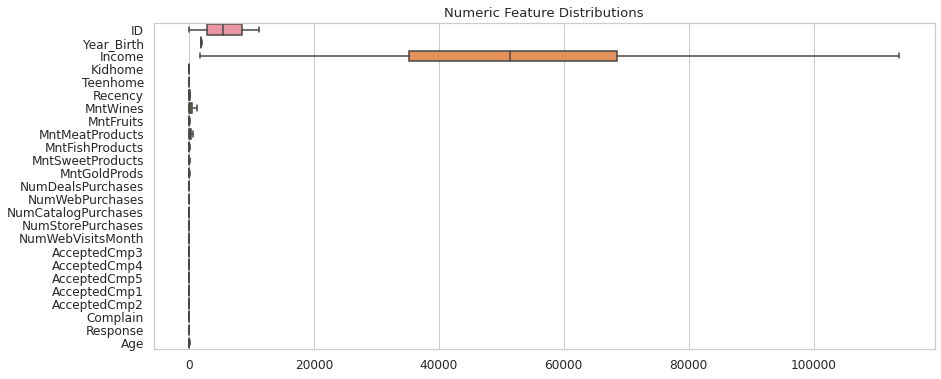

In [19]:
# =========================================================
# 3. Descriptive Statistics and Overview Plot
# =========================================================
desc_stats = df.describe().T[['mean', 'std', '50%', 'min', 'max']]
display(desc_stats)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols], orient='h', showfliers=False)
plt.title('Numeric Feature Distributions')
plt.savefig(f'{plot_dir}/Numeric Feature Distributions.png', bbox_inches='tight')
plt.show()

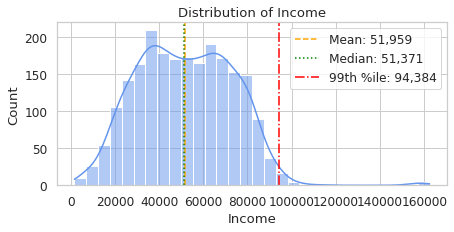

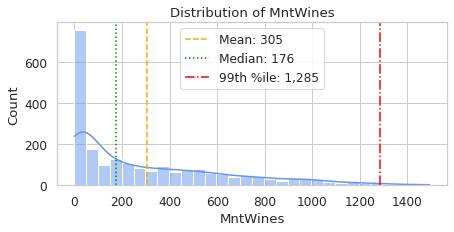

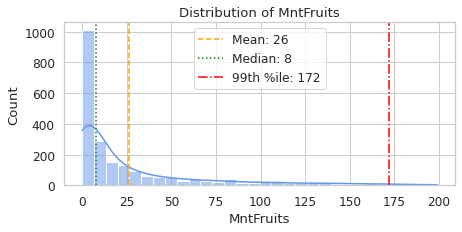

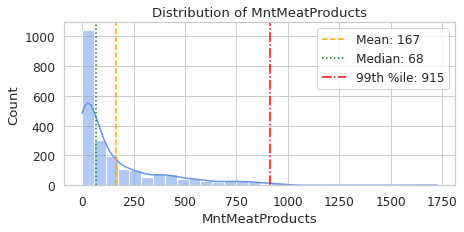

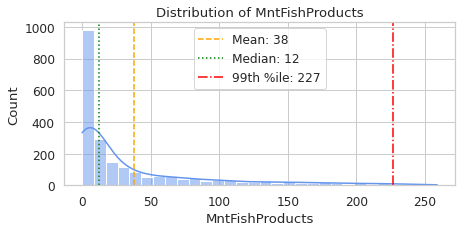

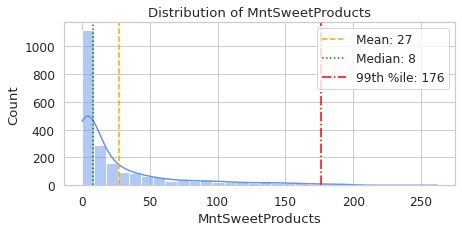

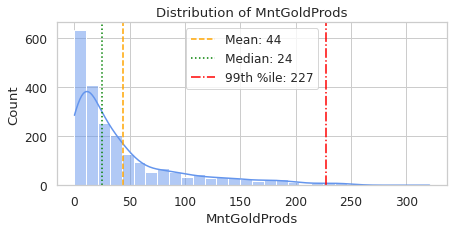

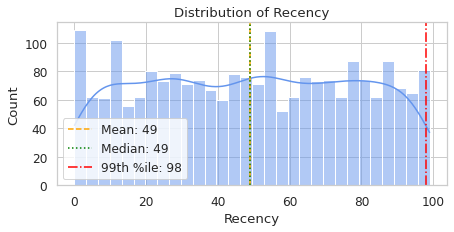

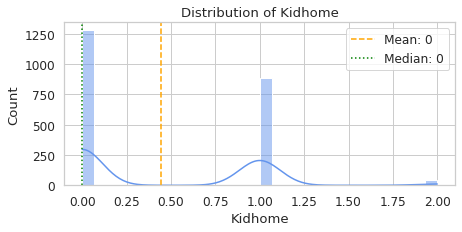

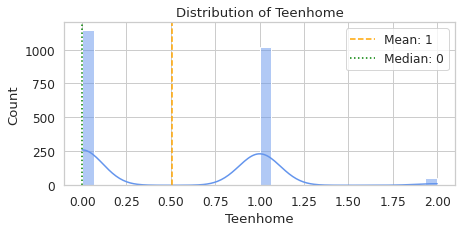

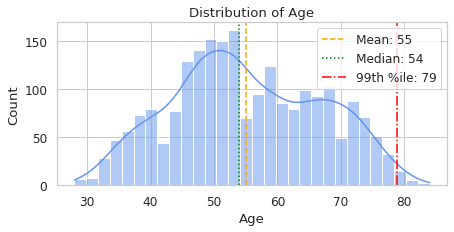

In [20]:
# =========================================================
# 4. Univariate Analysis with Annotations
# =========================================================
for col in ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'Recency', 'Kidhome', 'Teenhome', 'Age']:
    plt.figure(figsize=(7, 3))
    ax = sns.histplot(df[col].dropna(), kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    mean_val = df[col].mean()
    median_val = df[col].median()
    q99 = df[col].quantile(0.99)
    plt.axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:,.0f}')
    plt.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:,.0f}')
    if q99 < df[col].max():
        plt.axvline(q99, color='red', linestyle='-.', label=f'99th %ile: {q99:,.0f}')
    plt.legend()
    plt.savefig(f'{plot_dir}/Distribution of {col}.png', bbox_inches='tight')
    plt.show()

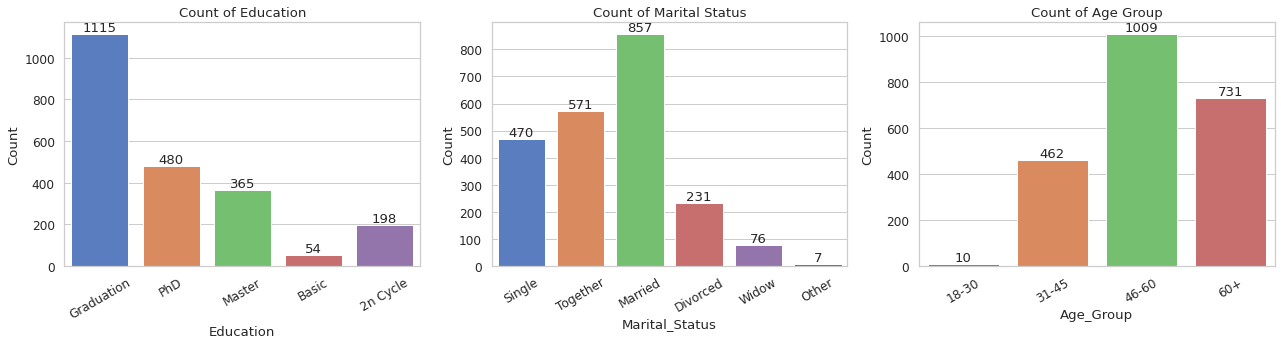

In [21]:
# =========================================================
# 5. Combined Categorical Counts: Demographics
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax = sns.countplot(x='Education', data=df, ax=axes[0])
axes[0].set_title('Count of Education')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)
for c in ax.containers:
    ax.bar_label(c, fmt='%d')

ax = sns.countplot(x='Marital_Status', data=df, ax=axes[1])
axes[1].set_title('Count of Marital Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=30)
for c in ax.containers:
    ax.bar_label(c, fmt='%d')

ax = sns.countplot(x='Age_Group', data=df, ax=axes[2])
axes[2].set_title('Count of Age Group')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=30)
for c in ax.containers:
    ax.bar_label(c, fmt='%d')

plt.tight_layout()
plt.savefig(f'{plot_dir}/Demographics_Distribution.png', bbox_inches='tight')
plt.show()

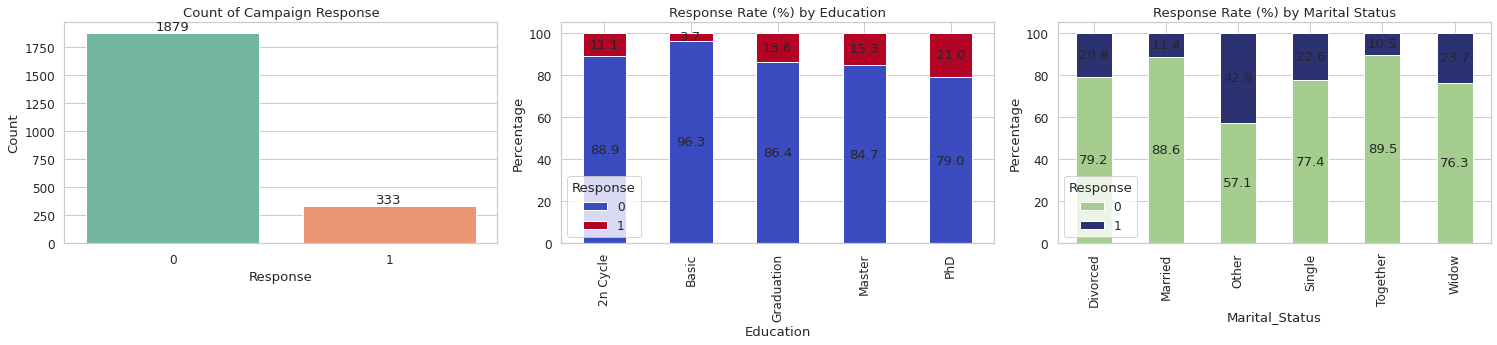

In [22]:
# =========================================================
# 6. Combined Campaign Response Distributions (Counts + Stacked Bars)
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

ax = sns.countplot(x='Response', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Count of Campaign Response')
axes[0].set_ylabel('Count')
for c in ax.containers:
    ax.bar_label(c, fmt='%d')

edu_resp = pd.crosstab(df['Education'], df['Response'], normalize='index') * 100
ax = edu_resp.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1])
axes[1].set_ylabel('Percentage')
axes[1].set_title('Response Rate (%) by Education')
axes[1].legend(title='Response')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')

ms_resp = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index') * 100
ax = ms_resp.plot(kind='bar', stacked=True, colormap='crest', ax=axes[2])
axes[2].set_ylabel('Percentage')
axes[2].set_title('Response Rate (%) by Marital Status')
axes[2].legend(title='Response')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')

plt.tight_layout()
plt.savefig(f'{plot_dir}/Campaign_Response_Distributions.png', bbox_inches='tight')
plt.show()

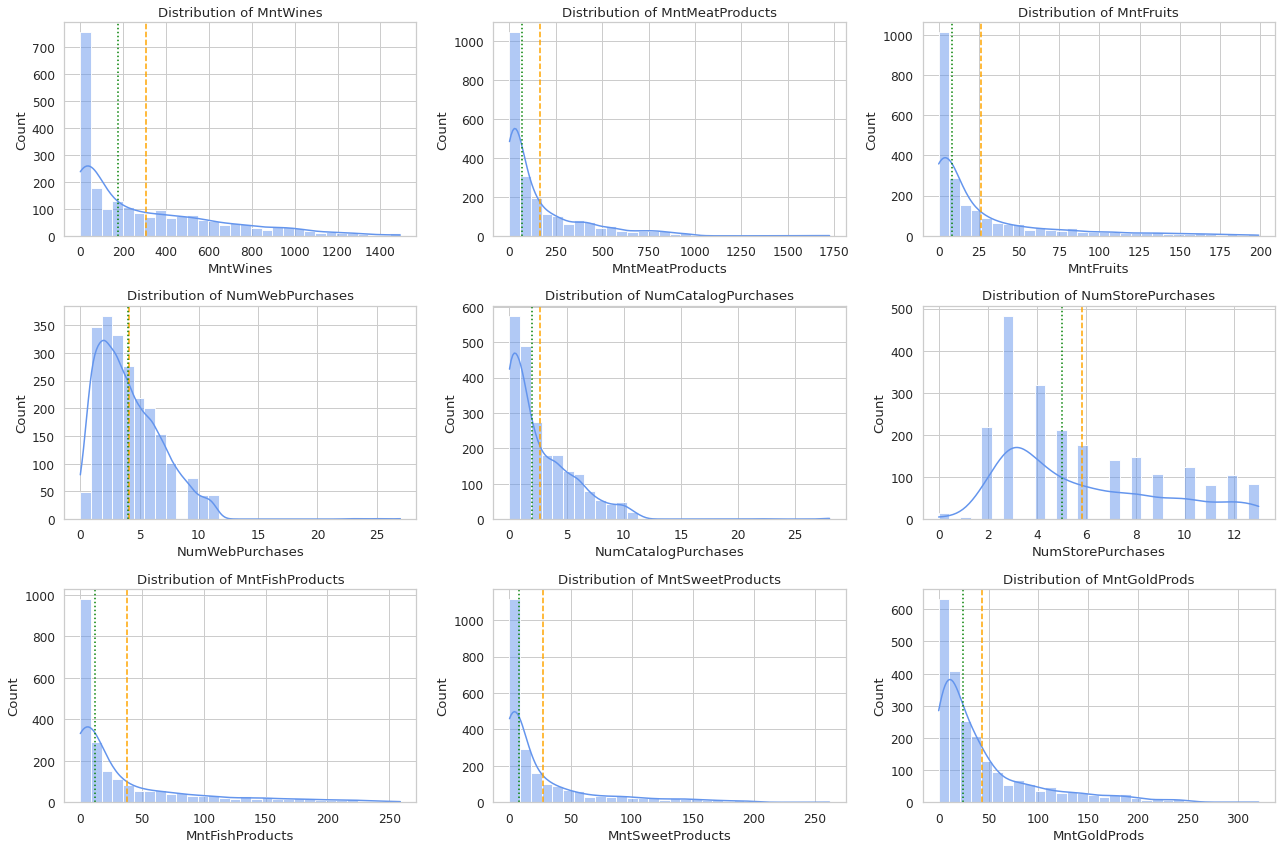

In [23]:
# =========================================================
# 7. Combined Spending and Purchase Behaviors (Histograms)
# =========================================================
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

spending_vars = [
    'MntWines', 'MntMeatProducts', 'MntFruits',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

axes = axes.flatten()

for i, col in enumerate(spending_vars):
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='cornflowerblue', ax=axes[i])
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--')
    axes[i].axvline(median_val, color='green', linestyle=':')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.savefig(f'{plot_dir}/Spending_and_Purchases_Distributions.png', bbox_inches='tight')
plt.show()

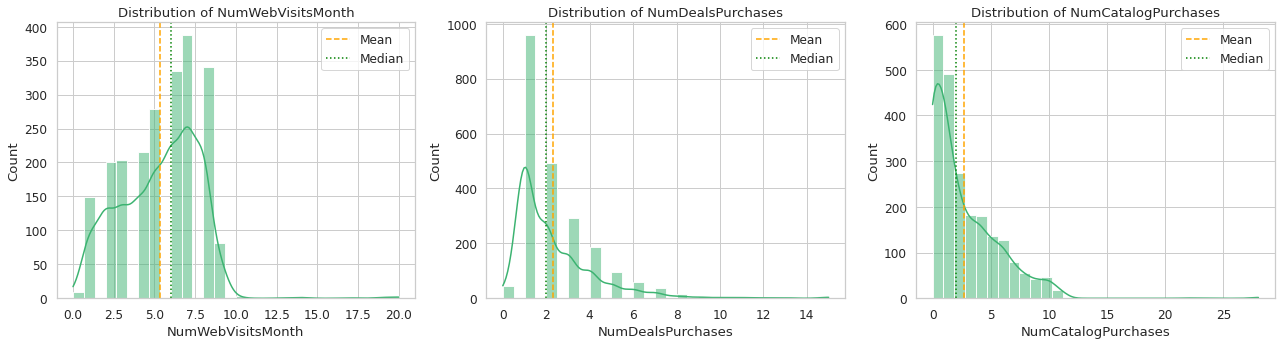

In [24]:
# =========================================================
# 8. Combined Web and Deal Interactions (Histograms)
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

vars_web_deals = ['NumWebVisitsMonth', 'NumDealsPurchases', 'NumCatalogPurchases']

for i, col in enumerate(vars_web_deals):
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='mediumseagreen', ax=axes[i])
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--', label='Mean')
    axes[i].axvline(median_val, color='green', linestyle=':', label='Median')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend()

plt.tight_layout()
plt.savefig(f'{plot_dir}/Web_and_Deal_Interactions.png', bbox_inches='tight')
plt.show()

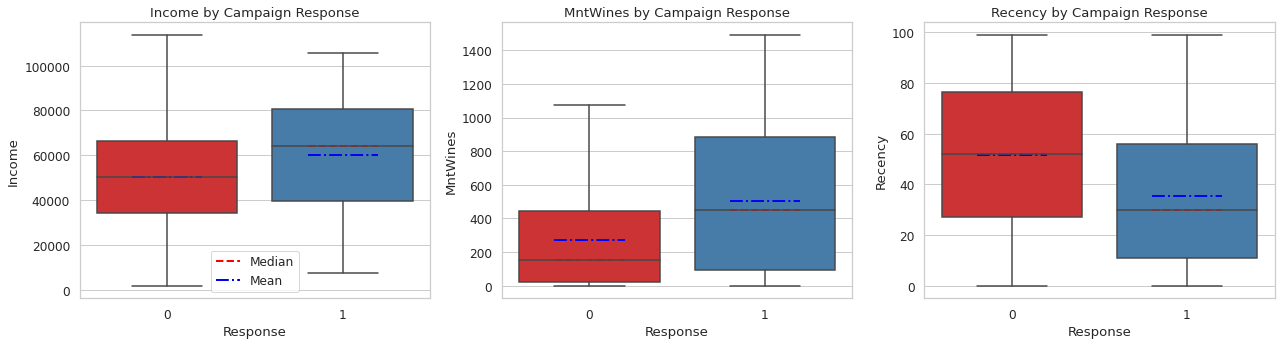

In [25]:
# =========================================================
# 9. Combined Numeric Features by Response (Boxplots with Med/Mean Lines)
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

num_response_vars = ['Income', 'MntWines', 'Recency']

for i, col in enumerate(num_response_vars):
    ax = sns.boxplot(x='Response', y=col, data=df, showfliers=False, palette='Set1', ax=axes[i])
    axes[i].set_title(f'{col} by Campaign Response')
    median_by_resp = df.groupby('Response')[col].median()
    mean_by_resp = df.groupby('Response')[col].mean()
    for j, resp_val in enumerate(sorted(df['Response'].unique())):
        ax.plot([j-0.2, j+0.2], [median_by_resp[resp_val]]*2, color='red', linestyle='--', lw=2,
                label='Median' if (i == 0 and j == 0) else "")
        ax.plot([j-0.2, j+0.2], [mean_by_resp[resp_val]]*2, color='blue', linestyle='-.', lw=2,
                label='Mean' if (i == 0 and j == 0) else "")
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.savefig(f'{plot_dir}/Numeric_Features_by_Response.png', bbox_inches='tight')
plt.show()

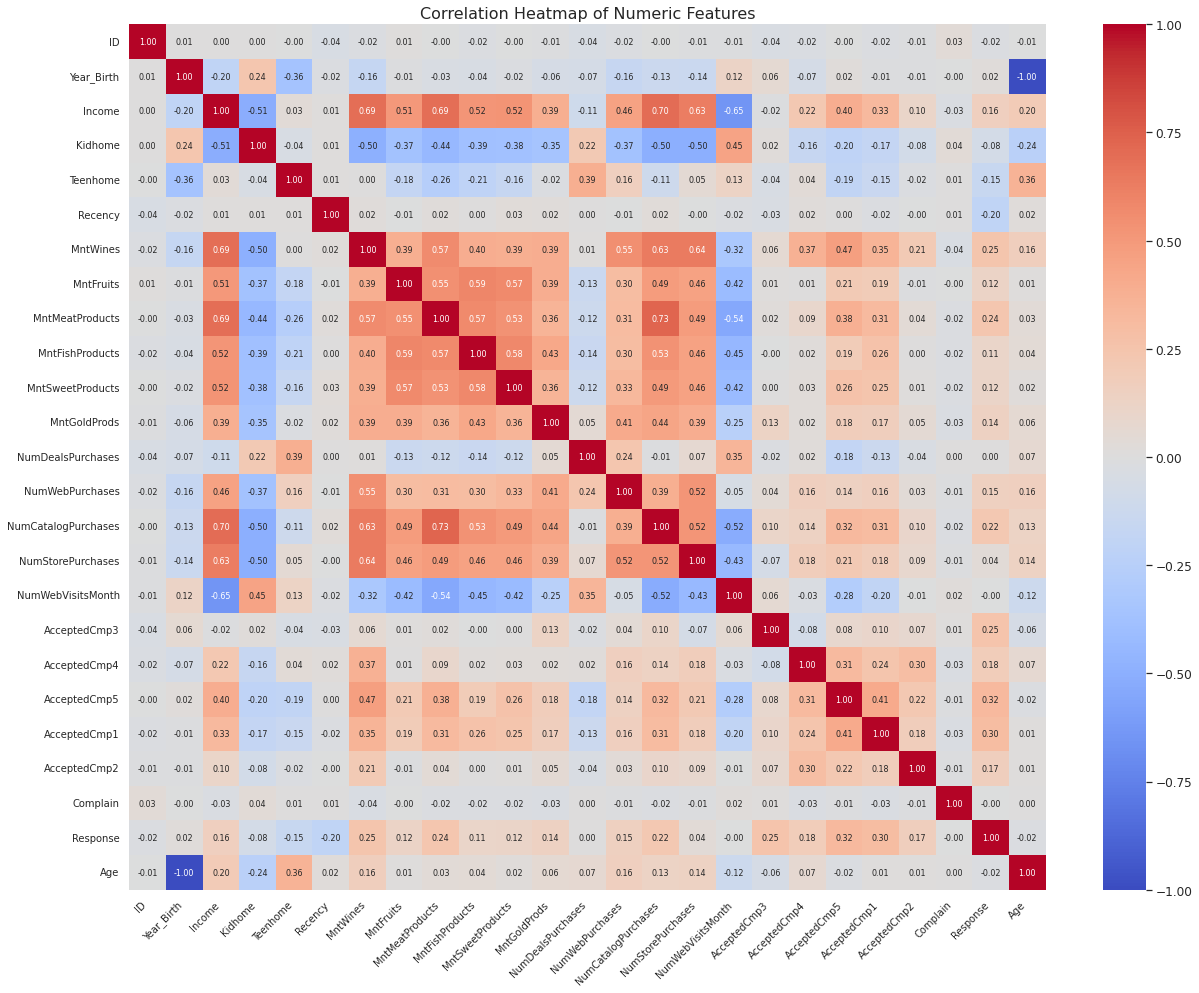

In [32]:
# =========================================================
# 10. Correlation Heatmap of Numeric Features
# =========================================================
plt.figure(figsize=(18, 14))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    annot_kws={"size": 8}
)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f'{plot_dir}/Correlation_Heatmap.png', bbox_inches='tight')
plt.show()


In [27]:
# =========================================================
# 11. Enhanced Automated Insights Summary
# =========================================================
def generate_insights(df):
    insights = []

    insights.append(f"Dataset contains {df.shape[0]:,} customers and {df.shape[1]} features after cleaning.")
    response_rate = df['Response'].mean() * 100
    insights.append(f"Overall campaign response rate: {response_rate:.2f}%.")

    corr = df.select_dtypes(include=['int64', 'float64']).corr()['Response'].drop('Response').sort_values(ascending=False)
    top_positive = corr.head(3)
    top_negative = corr.tail(3)
    insights.append("Top positive correlations with Response: " +
                    ", ".join([f"{idx} ({val:.2f})" for idx, val in top_positive.items()]))
    insights.append("Top negative correlations with Response: " +
                    ", ".join([f"{idx} ({val:.2f})" for idx, val in top_negative.items()]))

    complaint_rate = df['Complain'].mean() * 100
    insights.append(f"Complaint rate in dataset: {complaint_rate:.2f}% (very low, indicating high satisfaction or underreporting).")

    if df['Age'].max() <= 100 and df['Income'].max() <= 200000:
        insights.append("Outliers for Age (>100) and Income (>200,000) were removed, improving analysis robustness.")

    age_counts = df['Age_Group'].value_counts(normalize=True) * 100
    dominant_age_group = age_counts.idxmax()
    smallest_age_group = age_counts.idxmin()
    insights.append(f"Most common age group: {dominant_age_group} ({age_counts.max():.1f}%).")
    insights.append(f"Smallest age group: {smallest_age_group} ({age_counts.min():.1f}%).")

    income_resp = df.groupby('Response')['Income'].median()
    if 1 in income_resp and 0 in income_resp:
        diff_income = income_resp[1] - income_resp[0]
        insights.append(f"Median income for responders is {diff_income:.0f} higher than for non-responders.")

    edu_rate = (df.groupby('Education')['Response'].mean() * 100).sort_values(ascending=False)
    top_edu = edu_rate.index[0]
    insights.append(f"Highest response rate by education: {top_edu} ({edu_rate.iloc[0]:.1f}%).")

    ms_rate = (df.groupby('Marital_Status')['Response'].mean() * 100).sort_values(ascending=False)
    top_ms = ms_rate.index[0]
    insights.append(f"Highest response rate by marital status: {top_ms} ({ms_rate.iloc[0]:.1f}%).")

    rare_category = age_counts.idxmin()
    rare_rate = df[df['Age_Group'] == rare_category]['Response'].mean() * 100
    insights.append(f"Response rate for smallest age group ({rare_category}): {rare_rate:.1f}%.")

    return insights

# Generate and print summary
summary_points = generate_insights(df)
print("\n=== Automated EDA Insights Summary ===\n")
for point in summary_points:
    print("•", point)


=== Automated EDA Insights Summary ===

• Dataset contains 2,212 customers and 29 features after cleaning.
• Overall campaign response rate: 15.05%.
• Top positive correlations with Response: AcceptedCmp5 (0.32), AcceptedCmp1 (0.30), AcceptedCmp3 (0.25)
• Top negative correlations with Response: Kidhome (-0.08), Teenhome (-0.15), Recency (-0.20)
• Complaint rate in dataset: 0.90% (very low, indicating high satisfaction or underreporting).
• Outliers for Age (>100) and Income (>200,000) were removed, improving analysis robustness.
• Most common age group: 46-60 (45.6%).
• Smallest age group: 18-30 (0.5%).
• Median income for responders is 13940 higher than for non-responders.
• Highest response rate by education: PhD (21.0%).
• Highest response rate by marital status: Other (42.9%).
• Response rate for smallest age group (18-30): 30.0%.


In [28]:
# =========================================================
# 12. Markdown Cell for Key EDA Enhancements (to add manually in notebook)
# =========================================================

"""
> ## Key EDA Enhancements
> - Related categorical plots combined into multi-panel subplots for efficient comparison.
> - Added correlation heatmap for visualizing numeric feature relationships.
> - All bar plots include value labels on bars.
> - Boxplots and violin plots display median and mean lines with legends.
> - Consistent color palettes applied across plot themes for visual coherence.
> - Automated insights summary extended to highlight negative correlations, data cleaning effects, complaint rates, and rare category response rates.
> - All plots saved automatically in `eda_plots/` directory.
"""

'\n> ## Key EDA Enhancements\n> - Related categorical plots combined into multi-panel subplots for efficient comparison.\n> - Added correlation heatmap for visualizing numeric feature relationships.\n> - All bar plots include value labels on bars.\n> - Boxplots and violin plots display median and mean lines with legends.\n> - Consistent color palettes applied across plot themes for visual coherence.\n> - Automated insights summary extended to highlight negative correlations, data cleaning effects, complaint rates, and rare category response rates.\n> - All plots saved automatically in `eda_plots/` directory.\n'